# Primera Entrega
## Análisis de Videojuegos de PlayStation (API Pública)

En este trabajo utilizo una API pública para analizar información básica de videojuegos.

## Abstract y Motivación

Elegí analizar videojuegos porque es una industria muy grande. El objetivo es observar qué géneros, desarrolladores y publishers aparecen con mayor frecuencia.

**Audiencia:** Este análisis está dirigido a gamers, estudiantes de desarrollo de videojuegos y creadores de contenido que buscan comprender qué tipos de juegos y estudios dominan la oferta actual en el mercado.

## Preguntas

1. ¿Qué géneros aparecen más?
2. ¿Qué desarrolladores aparecen más?
3. ¿Qué publishers aparecen más?

## Importar datos desde la API

Uso una API pública que no necesita API key.

In [7]:
import requests
import pandas as pd
import os

url = "https://api.sampleapis.com/playstation/games"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data)
    if not os.path.exists('data'):
        os.makedirs('data')
    df.to_csv("data/videojuegos_playstation.csv", index=False)
    print("Datos cargados correctamente")
    print(df.head())
else:
    print("Error:", response.status_code)

Datos cargados correctamente
   id                    name       genre                 developers  \
0   1         #killallzombies   [Shooter]              [Beatshapers]   
1   2       10 Second Ninja X  [Platform]  [Four Circle Interactive]   
2   3        100ft Robot Golf    [Sports]                [No Goblin]   
3   4         101 Ways to Die    [puzzle]          [Four Door Lemon]   
4   5  11-11: Memories Retold          []        [Aardman, DigixArt]   

                     publishers  \
0                 [Beatshapers]   
1               [Curve Digital]   
2                   [No Goblin]   
3                [Vision Games]   
4  [Bandai Namco Entertainment]   

                                        releaseDates  
0  {'Japan': 'Unreleased', 'NorthAmerica': 'Nov 1...  
1  {'Japan': 'Unreleased', 'NorthAmerica': 'Jul 1...  
2  {'Japan': 'Unreleased', 'NorthAmerica': 'Oct 1...  
3  {'Japan': 'Unreleased', 'NorthAmerica': 'Mar 2...  
4  {'Japan': 'Nov 9, 2018', 'NorthAmerica': 'Nov ...

## Exploración inicial

In [2]:
df.shape

(1151, 6)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1151 non-null   int64 
 1   name          1151 non-null   object
 2   genre         1151 non-null   object
 3   developers    1151 non-null   object
 4   publishers    1151 non-null   object
 5   releaseDates  1151 non-null   object
dtypes: int64(1), object(5)
memory usage: 54.1+ KB


## Géneros más frecuentes

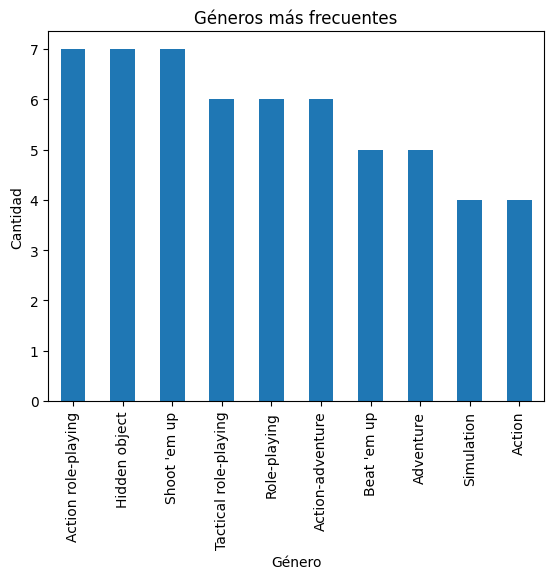

In [4]:
import matplotlib.pyplot as plt

genre_counts = df["genre"].explode().value_counts().head(10)

plt.figure()
genre_counts.plot(kind="bar")
plt.title("Géneros más frecuentes")
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.show()

## Desarrolladores más frecuentes

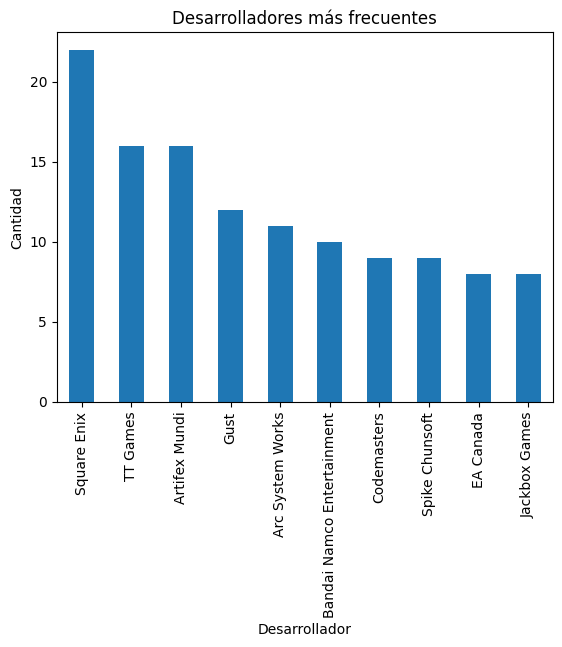

In [5]:
dev_counts = df["developers"].explode().value_counts().head(10)

plt.figure()
dev_counts.plot(kind="bar")
plt.title("Desarrolladores más frecuentes")
plt.xlabel("Desarrollador")
plt.ylabel("Cantidad")
plt.show()

## Publishers más frecuentes

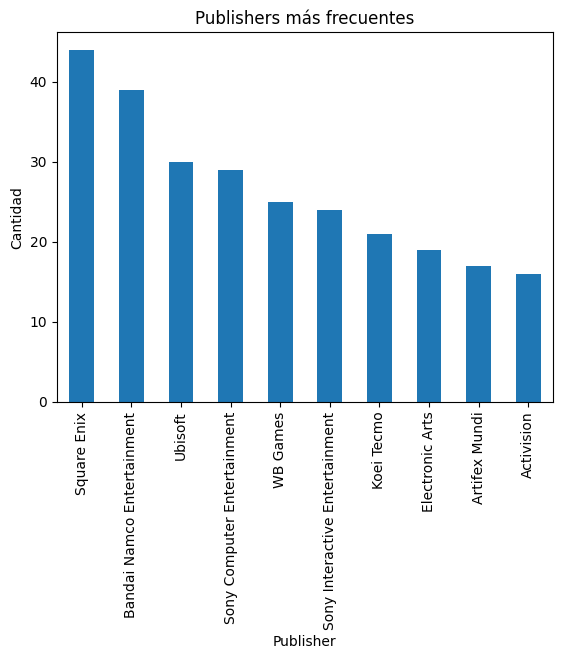

In [6]:
pub_counts = df["publishers"].explode().value_counts().head(10)

plt.figure()
pub_counts.plot(kind="bar")
plt.title("Publishers más frecuentes")
plt.xlabel("Publisher")
plt.ylabel("Cantidad")
plt.show()

## Insights y Conclusiones

A partir del análisis exploratorio y las visualizaciones, pudimos responder nuestras preguntas iniciales:

- **Géneros:** Se observa una clara dominancia del género Action Role-playing, seguido por Hidden Object.
- **Desarrolladores:** El estudio que más juegos ha desarrollado en esta lista es Square Enix.
- **Publishers:** La empresa con mayor cantidad de publicaciones es Square Enix.